In [1]:
#!pip install cartopy

In [2]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature

from wrf import (to_np, 
                 getvar, 
                 smooth2d, 
                 get_cartopy, 
                 cartopy_xlim,
                 cartopy_ylim, 
                 latlon_coords)

In [3]:
# Ruta para la carga del archivo NetCDF
#ncfile = Dataset('/home/magnus/ARW/Outputs/wrfout_d01_2024-07-22_00:00:00')
ncfile = Dataset('/home/magnus/ARW/Outputs/wrfout_d02_2024-07-22_00:00:00')

In [39]:
# Get the sea level pressure
tmp = getvar(ncfile, "T2")

ncval = tmp #-273.15
# Actualizar el atributo de la unidad
ncval.attrs['units'] = 'C'
ncval

<xarray.DataArray 'T2' (south_north: 175, west_east: 230)> Size: 161kB
array([[302.0693 , 302.07065, 302.09164, ..., 297.38232, 297.38892,
        297.40875],
       [302.09286, 302.0884 , 302.09985, ..., 297.36087, 297.37518,
        297.4013 ],
       [302.09222, 302.0863 , 302.09207, ..., 297.34824, 297.3742 ,
        297.4073 ],
       ...,
       [301.4635 , 301.46362, 301.46744, ..., 301.7022 , 301.69922,
        301.69803],
       [301.4844 , 301.48425, 301.48517, ..., 301.69852, 301.69568,
        301.6948 ],
       [301.4942 , 301.4946 , 301.49414, ..., 301.6882 , 301.68588,
        301.6858 ]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 161kB -79.26 -79.22 ... -68.74
    XLAT     (south_north, west_east) float32 161kB 7.948 7.948 ... 15.77 15.77
    XTIME    float32 4B 0.0
    Time     datetime64[ns] 8B 2024-07-22
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  TEMP at 2 M
    units:        C
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   Mercator(stand_lon=-74.0, moad_cen_lat=11.999992370605469, ...

In [40]:
# Smooth the sea level pressure since it tends to be noisy near the
# mountains
smooth_ncval = smooth2d(ncval, 3, cenweight=2)

In [41]:
# Get the latitude and longitude points
lats, lons = latlon_coords(ncval)

# Get the cartopy mapping object
cart_proj = get_cartopy(ncval)

In [42]:
ncval = ncval-273.15

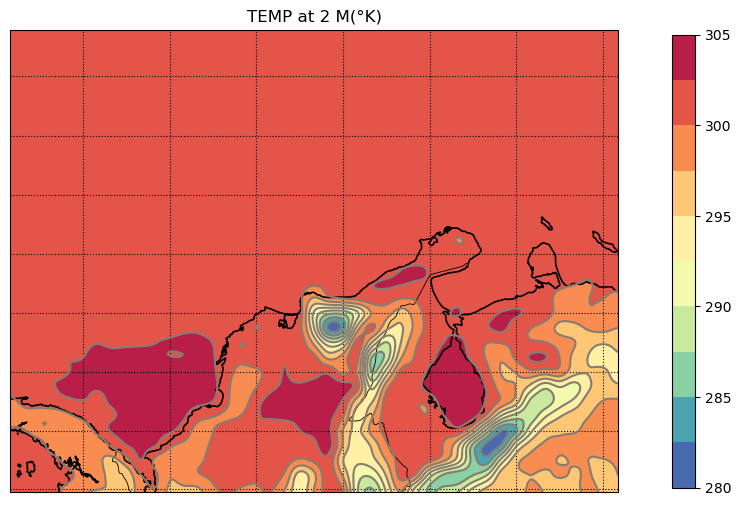

In [43]:
# Create a figure
fig = plt.figure(figsize=(14,6))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)

# Download and add the states and coastlines
states = NaturalEarthFeature(category="cultural", scale="10m",
                             facecolor="none",
                             name="admin_0_boundary_lines_land")

ax.add_feature(states, linewidth=0.6, edgecolor="black")
ax.coastlines('10m', linewidth=1.2)

# Set the map bounds
ax.set_xlim(cartopy_xlim(smooth_ncval))
ax.set_ylim(cartopy_ylim(smooth_ncval))

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
plt.contour(lons.to_numpy(),       
            lats.to_numpy(), 
            smooth_ncval.to_numpy(), 
            10,
            colors='#877C72',
            transform=crs.PlateCarree())

plt.contourf(lons.to_numpy(),       
             lats.to_numpy(), 
             smooth_ncval.to_numpy(),  
             10,
             cmap = plt.colormaps.get_cmap('Spectral_r'),
             transform=crs.PlateCarree())

# Add a color bar
plt.colorbar(ax=ax, shrink=.98)

plt.title("TEMP at 2 M(°K)")
plt.savefig("ncval.pdf",bbox_inches='tight', pad_inches=0)
plt.show()
